### Visualization of individual data on map with `folium`, `geoJSON` and `pandas DataFrame`

#### 1. Preparation
##### 1.1. Load `folium`
> official `github` : https://github.com/python-visualization/folium  
> documentation : https://python-visualization.github.io/folium/index.html  
> examples : https://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/  
> plugins : https://python-visualization.github.io/folium/plugins.html#folium-plugins  
> * sample 1 : https://dailyheumsi.tistory.com/85?category=815369  
> * sample 2 : https://dailyheumsi.tistory.com/92?category=815369  
  
> contributions : https://nbviewer.jupyter.org/github/python-visualization/folium_contrib/tree/master/notebooks/  

In [1]:
import folium

##### 1.2. Function: capture `html` to `png`  
* This case is for `Firefox`.  
```python
browser = webdriver.Firefox()
```  
should be modified according to the browser.  
* Since the size of `html` is too large sometimes, `png` is preferred.  
* Large `html` file exceeds the maximum waiting time for rendering.
  - in this case, edit `browser.set_page_load_timeout(time_in_seconds)` part with larger number

In [3]:
from selenium import webdriver
import time, os

!export PATH="/home/jehyun/PycharmProjects/selenium/:$PATH"

def html2png(m,                     # foium map instance
             html_name,             # str. ex. 'testmap.html'
             png_name='map.png',    # str. ex. 'testmap.png'
             delay=5,               # int or float. ex. 10
             ):

    delay=delay
    fn = 'html/' + html_name
    tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
    m.save(fn)

    browser = webdriver.Firefox()

    try:
        browser.set_page_load_timeout(600)
        browser.get(tmpurl)
        
    except TimeoutException as ex:
        isrunning = 0
        print("Exception has been thrown. " + str(ex))
        browser.close()

    #Give the map tiles some time to load
    time.sleep(delay)
    browser.save_screenshot('./images/'+png_name)
    browser.quit()

##### 1.3. Function : `pandas DataFrame` to `markdown`

In [4]:
# Nice representation of dataframe in markdown
import pandas as pd
import copy
from IPython.display import Markdown, display

def df2md(df, maxlen=20):
    _df = copy.deepcopy(df)
    
    for col in _df.columns:
        _df[col] = _df[col].astype('str')
        if (_df[col].str.len()> maxlen).any() :
            _df[col].loc[_df[col].str.len() > maxlen] = _df[col].str.slice(stop=maxlen) + ' ...'

    if '(index)' not in _df.columns:
        _df.insert(0, '(index)', df.index)
        
    fmt = ['---' for i in range(len(_df.columns))]
    df_fmt = pd.DataFrame([fmt], columns=_df.columns)
    df_formatted = pd.concat([df_fmt, _df])
    display(Markdown(df_formatted.to_csv(sep="|", index=False)))
    _df.drop(columns='(index)', axis=1, inplace=True)

#### 2. Load Data
##### 2.1. Solar Radiation data on each buildings in Daejeon

In [5]:
df = pd.read_excel('NGL.xlsx')
df.drop(index=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df2md(df.head())

(index)|gid|buld_se_cd|buld_se_nm|bdtyp_cd|apt_yn|gro_flo_co|sig_cd|sig_nm|emd_cd|emd_nm|tm_x|tm_y|lon|lat|buld_area|buld_elev|m01|m02|m03|m04|m05|m06|m07|m08|m09|m10|m11|m12|y17|st_m01|st_m02|st_m03|st_m04|st_m05|st_m06|st_m07|st_m08|st_m09|st_m10|st_m11|st_m12|st_y17
---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---
0|24300|0|지상|4299|N|1|30110|동구|30110137|대별동|241302.419829207|409864.414379324|127.459746194608|36.2858798245272|199.109760164108|80|61.587998174704|76.368132857176|108.372413947032|130.399191728005|153.301471581826|138.981246232986|94.1192299952874|116.160557618508|107.075909293615|76.0582836270332|63.2461349872442|57.7913106771616|1183.46187899663|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281
1|16295|0|지상|1001|N|1|30110|동구|30110105|가오동|240815.01297069|412384.958080419|127.454452653456|36.3086147051094|77.3923177693719|71|54.6587660438136|74.3240604024184|109.983418941498|131.021371841431|148.915192252711|136.026762912148|91.4622986442164|112.346493419848|109.010571178637|75.9642522084086|59.7529277174096|48.7103261571181|1152.17643617329|77.5996551513672|96.7234191894531|136.413635253906|159.390518188477|180.87614440918|165.518310546875|112.231346130371|137.366897583008|134.195907592773|96.3771133422852|79.9522476196289|72.7179718017578|1449.36315917969
2|24341|0|지상|1001|N|1|30110|동구|30110137|대별동|241460.822383503|410090.94543095|127.461521377075|36.2879144426327|91.0763856790575|77|62.304043189339|78.0388102324113|110.389678457509|130.250699416451|150.068157859471|135.022302627563|92.2708638232687|114.937465916509|108.497603748156|77.568351952926|64.5584099811056|58.3052325248718|1182.21162281866|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281
3|24345|0|지상|4402|N|1|30110|동구|30110137|대별동|241530.22297262|410067.763074595|127.462292655181|36.2877025481814|51.2017056163047|78|48.6805400936692|60.6419043452651|86.4692395528158|105.063324045252|123.864551473547|112.271188029536|75.3915986661558|93.4298842041581|85.6682357434873|60.3520038746021|50.0022062372278|45.6562534349936|947.490926106771|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281
4|24374|0|지상|18999|N|1|30110|동구|30110137|대별동|241500.967910986|409605.204042476|127.461942445015|36.2835354035404|455.844166700596|80|67.2504756116031|84.0601618833709|119.429690775118|141.218664905481|162.556833049707|146.167080444202|99.8334377941332|124.410167208889|117.419092797396|83.4298420412499|69.2576492167356|62.8880742809229|1277.92121626201|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281


##### 2.2. `JSON` files for Administrative districts

In [6]:
# 'gu' and dong' data in Korea
gu = f'https://raw.githubusercontent.com/jehyunlee/data-snippet/master/Korea_gu_20.json' 
dong = f'https://raw.githubusercontent.com/jehyunlee/data-snippet/master/Korea_dong_20.json' 

###### 2.2.1. Function : Load `JSON` from web

In [7]:
import json
import urllib.request

def read_webjson(url):
  with urllib.request.urlopen(url) as src:
    data = json.loads(src.read().decode(), encoding='utf-8')
    return data 

###### 2.2.2. Load `JSON` from web(gu) and local(dong)

In [8]:
gu_data = read_webjson(gu)    # read 'gu' json from data-snippet

# read 'dong'
# For unknown reason, it is not possible to read from web.
dong_data = json.loads(open('./geojsons/Korea_dong_20.json', 'r', encoding='utf-8').read())

###### 2.2.3. Data Validataion

In [9]:
# Extracting 'gu' data from JSON
gu_dj = {}
gu_dj_value = []
SIG_KOR_NM = []    # list of 'gu's

for key, value in gu_data.items():
  if key != 'features':
    gu_dj.update({key: value})
  else:
    for feature in gu_data['features']:
      properties = feature['properties']
      sig_cd = properties['SIG_CD']
      if sig_cd[:2] == '30':
        SIG_KOR_NM.append(properties['SIG_KOR_NM'])
        gu_dj_value.append(feature)
gu_dj['features'] = gu_dj_value
        
print('# of "gu"s in Daejeon = {}'.format(len(SIG_KOR_NM)))
print(SIG_KOR_NM)        

# save list of 'gu's in json format
with open("gu_dj.json","w", encoding='utf-8') as jsonfile:
        json.dump(gu_dj,jsonfile,ensure_ascii=False)

# of "gu"s in Daejeon = 5
['동구', '중구', '서구', '유성구', '대덕구']


In [10]:
import numpy as np

# 1. Grouping 'dong' data from Solar Radiation

df_dong = df.groupby(by='emd_nm').mean().reset_index()

# 2. Extracting 'dong' data from JSON
dong_dj = {}
dong_dj_value = []
EMD_KOR_NM = []    # list of 'dong's

for key, value in dong_data.items():
  if key != 'features':
    dong_dj.update({key: value})
  else:
    for feature in dong_data['features']:
      properties = feature['properties']
      emd_cd = properties['EMD_CD']
      if emd_cd[:2] == '30': # 'dong' filter : only in Daejeon
        EMD_KOR_NM.append(properties['EMD_KOR_NM'])
        dong_dj_value.append(feature)
dong_dj['features'] = dong_dj_value

print('# of "dong"s in Daejeon(JSON) = {}'.format(len(EMD_KOR_NM)))  # Wrong Value : Duplicates exist 
print(sorted(EMD_KOR_NM))  

# 3. Find duplicates - geoJSON compression might have caused geometric split
import collections
print('\nDuplicates are {}'.format([item for item, count in collections.Counter(EMD_KOR_NM).items() if count > 1]))
EMD_KOR_NM = list(np.sort(np.unique(np.array(EMD_KOR_NM))))

print('\n# of  "dong"s in Daejeon(JSON, unique) = {}'.format(len(EMD_KOR_NM)))
print(sorted(EMD_KOR_NM))

# 4. Find missings - data from solar irradiation might have missing data
dong_solar = df_dong['emd_nm'].unique()
missing = []
for dong in EMD_KOR_NM:
  if dong not in dong_solar:
    missing.append(dong)
    
print('\nMissing "dong"s(Solar) = {}'.format(missing))

# 5. Save list of 'dong's in json format, including duplicates,
# because it is not important to treat them at the moment.
with open("dong_dj.json","w", encoding='utf-8') as jsonfile:
        json.dump(dong_dj,jsonfile,ensure_ascii=False)

# of "dong"s in Daejeon(JSON) = 177
['가수원동', '가양동', '가오동', '가장동', '가정동', '갈마동', '갈전동', '갑동', '계산동', '관저동', '관평동', '괴곡동', '괴정동', '교촌동', '구도동', '구룡동', '구성동', '구암동', '구완동', '궁동', '금고동', '금동', '금탄동', '낭월동', '내동', '내탑동', '노은동', '대동', '대동', '대별동', '대사동', '대성동', '대정동', '대화동', '대흥동', '덕명동', '덕암동', '덕진동', '도룡동', '도마동', '도안동', '둔곡동', '둔산동', '마산동', '만년동', '매노동', '목달동', '목동', '목상동', '무수동', '문지동', '문창동', '문평동', '문화동', '미호동', '반석동', '방동', '방현동', '법동', '변동', '복수동', '복용동', '봉곡동', '봉명동', '봉산동', '부사동', '부수동', '비래동', '비룡동', '사성동', '사정동', '산성동', '산직동', '삼괴동', '삼성동', '삼정동', '삼정동', '상대동', '상서동', '상소동', '석교동', '석봉동', '선화동', '성남동', '성북동', '세동', '세천동', '소제동', '소호동', '송강동', '송정동', '송촌동', '수남동', '신대동', '신동', '신봉동', '신상동', '신성동', '신안동', '신일동', '신촌동', '신탄진동', '신하동', '신흥동', '안산동', '안영동', '어남동', '어은동', '연축동', '오동', '오동', '오류동', '오정동', '옥계동', '와동', '외삼동', '용계동', '용계동', '용두동', '용문동', '용산동', '용운동', '용전동', '용촌동', '용호동', '우명동', '원내동', '원동', '원신흥동', '원정동', '원촌동', '월평동', '유천동', '은행동', '읍내동', '이사동', '이현동', '인동', '자양동', '자운동

#### 3. Data Visualization
> How to use colormap with `folium` marker plot : https://stackoverflow.com/questions/56876620/unsure-how-to-use-colormap-with-folium-marker-plot  
> Colormap code-snippets : https://stackoverflow.com/questions/52911688/python-folium-choropleth-map-colors-incorrect/52981115#52981115  
> Colormap and other code-snippets : http://incredible.ai/code-snippet/2019/03/16/GeoHash-And-GeoPandas/  
> Color gradient code-snippets : https://stackoverflow.com/questions/25668828/how-to-create-colour-gradient-in-python  

##### 3.1. Find Map Center Coordination

In [54]:
df['shadow'] = 1 - df['y17']/df['st_y17']

In [11]:
# center of the map

lon_avg = df['lon'].mean()
lat_avg = df['lat'].mean()
print(lon_avg, lat_avg)

127.4013580315068 36.340743659590096


##### 3.2. Function : Additive Color Operation 

In [12]:
def add_color(c1, c2, c3, ipol=0):
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    c3=np.array(mpl.colors.to_rgb(c3))
    if ipol < 0.5:
        # if c1 and c2 are parallel
        if np.dot(c1, c2) == np.linalg.norm(c1) * np.linalg.norm(c2):
            c = 2*((0.5-ipol)*c1 + ipol*c2)
        else:
            if ipol < 0.25:
                c = c1 + 4*ipol * c2
            elif ipol < 0.5:
                c = (2 - 4*ipol) * c1 + c2
    else:
        # if c2 and c3 are parallel
        if np.dot(c2, c3) == np.linalg.norm(c2) * np.linalg.norm(c3):
            c = 2*((1-ipol)*c2 + (ipol-0.5)*c3)
        else:
            if ipol < 0.75:
                c = c2 + (4*ipol-2) * c3
            else:
                c = (4 - 4*ipol) * c2 + c3
    
    if c.max() > 1:
        c = c/c.max()
        
    return mpl.colors.to_hex(c)

##### 3.3. Function : Map + Admistrative Districts + Data + Customized Colormap

In [55]:
import branca
import branca.colormap as cm
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def dj_datamap(df,               # pandas DataFrame
               col,              # column to plot in df
               *colors,          # colors for colormap formation : [c1, c2, c3]
               legend = None,    # legend. if None, 'col' is applied.
               datanum = None,   # number of data to plot. if None, all data.
               binmin = None,    # min. value of data to colorize
               binmax = None,    # max. value of data to colorize
               binstep = 5,      # number of bins 
               colortype = 'linear'  # 'linear' or 'step'
              ):
    # filename to be saved
    filename = '{}_{}'.format(col, legend)
    
    # folium map
    m = folium.Map(location=[lat_avg, lon_avg], 
                   tiles='CartoDB positron',
                   zoom_start=11)

    # style function for 'gu'
    style_function_gu = {
                    'opacity': 0.7,
                    'weight':1,
                    'fillOpacity': 1,
                    'color': 'black',
                    'fillColor': 'white'
                    }
    
    # style function for 'dong'
    style_function_dong = {
                    'opacity': 0.7,
                    'weight':1,
                    'fillOpacity': 0,
                    'color': 'gray',
                    'fillColor': 'white'
                    }

    # plot: adminstrative districts 'gu'
    folium.GeoJson(gu_dj, name='gu_dj',
                   style_function=lambda x: style_function_gu        # style_function has to be a function which calls dictionary
                  ).add_to(m)        # Overlay on map
    
    # plot : administrative districts 'dong'
    folium.GeoJson(dong_dj, name='dong_dj',
                   style_function=lambda x: style_function_dong        # style_function has to be a function which calls dictionary
                  ).add_to(m)        # Overlay on map

    # colormap settings
    # - values to colorize
    if binmin == None:
        vmin = df[col].min()
    else:
        vmin = binmin
        
    if binmax == None:    
        vmax = df[col].max()
    else:
        vmax = binmax
    
    # - number of data to plot
    if datanum == None:
        datanum = df.shape[0]
    
    # - colormap configuration
    c1 = colors[0][0]
    c2 = colors[0][1]
    c3 = colors[0][2]
    
    if colortype == 'linear':
        clrmap = cm.LinearColormap(colors=[c1, c2, c3], vmin=vmin, vmax=vmax)
    elif colortype == 'step':
        _colors = []
        for i in range(binstep):
            _colors.append(add_color(c1, c2, c3, i/(binstep-1)))
        
        #- colormap visualization
        bins = np.linspace(vmin, vmax, num=binstep+1)
    
        fig, axes = plt.subplots(figsize=(2,4), nrows=binstep+1, ncols=2, sharex=True)
        for i in range(binstep+1):
            rect = axes[i][0].patch
            rect.set_facecolor(_colors[binstep-i-1])
            if i == binstep:
                rect.set_alpha(0)
            axes[i][0].set_xlabel('')
            axes[i][0].set_ylabel('')
            axes[i][0].set_xticks([])
            axes[i][0].set_yticks([])
            axes[i][0].set_xticklabels([])
            axes[i][0].set_yticklabels([])
            axes[i][0].spines['top'].set_visible(True)
            axes[i][0].spines['right'].set_visible(False)
            axes[i][0].spines['bottom'].set_visible(False)
            axes[i][0].spines['left'].set_visible(False)
        for i in range(binstep+1):
            axes[i][1].text(0.1, 1, '{:2.2f}'.format(float(bins[binstep-i])), transform=axes[i][1].transAxes, fontsize=14, va='top', ha='left')
            axes[i][1].set_xlabel('')
            axes[i][1].set_ylabel('')
            axes[i][1].set_xticks([])
            axes[i][1].set_yticks([])
            axes[i][1].set_xticklabels([])
            axes[i][1].set_yticklabels([])
            axes[i][1].spines['top'].set_visible(False)
            axes[i][1].spines['right'].set_visible(False)
            axes[i][1].spines['bottom'].set_visible(False)
            axes[i][1].spines['left'].set_visible(False)
            
        plt.subplots_adjust(wspace=0, hspace=0, left=0.05, right=0.95, top=0.99, bottom=0.12)
        #plt.tight_layout()
        plt.savefig('./images/{}_legend.png'.format(filename))
        plt.show()
        
        clrmap = cm.StepColormap(colors=_colors, vmin=vmin, vmax=vmax,
                                index=np.linspace(vmin, vmax, binstep+1))
    
    # plot : data as markers (actually, dots)
    for idx in df.index[:datanum]:
        # Get longitude/latitude
        lon = df.at[idx, 'lon']
        lat = df.at[idx, 'lat']

        data = df.at[idx, col]
       
        folium.CircleMarker(
            location = [lat, lon],
            color='grey',
            fill_color=clrmap(data),
            fill_opacity=1,
            radius=0.5,
            weight=0
        ).add_to(m)
        
    # legend
    if colortype == 'linear':
        clrmap = clrmap.to_step(index=np.linspace(vmin, vmax, num=binstep))
    elif colortype == 'step':
        pass
    
    if legend == None:
        legend = col
    
    clrmap.caption=legend
    clrmap.add_to(m)

    # layer control ON
    folium.LayerControl().add_to(m)
    
    # save as file
    html2png(m, '{}.html'.format(filename), '{}.png'.format(filename))
    
    return _colors

In [14]:
colors = ['#ffff00', '#ffa000', '#ff6000']

#ffff00
#ffd000
#ffa000
#ff8000
#ff6000


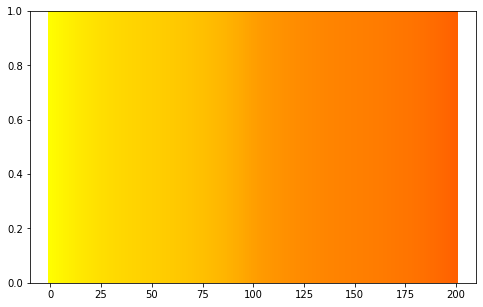

In [15]:
%matplotlib inline

n = 200
fig, ax = plt.subplots(figsize=(8, 5))
for x in range(n+1):
    color = add_color(colors[0],colors[1],colors[2], x/n)
    if x in [0, 50, 100, 150, 200]:
        print(color)
    ax.axvline(x, color=color, linewidth=4) 
plt.show()

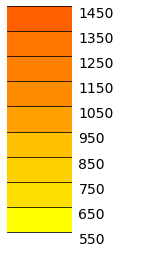

['#ffff00',
 '#ffdf00',
 '#ffd000',
 '#ffc000',
 '#ffa000',
 '#ff8b00',
 '#ff8000',
 '#ff7500',
 '#ff6000']

In [16]:
dj_datamap(df, 'y17', colors, legend='radiation with shadows', datanum=None, binmin=550, binmax=1450, binstep=9, colortype='step')

Note : the `html` file is about 70 MB, where `png` file is only about 640 KB.  

In [48]:
colors = ['deepskyblue', 'blue', 'navy']

#00bfff
#0060ff
#0000ff
#0000c0
#000080


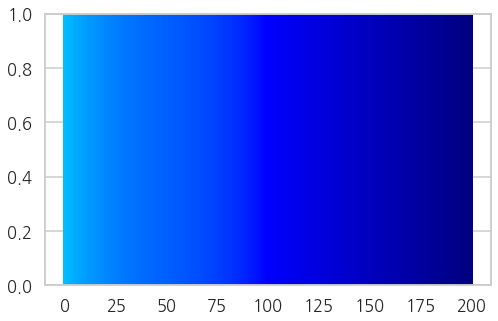

In [49]:
%matplotlib inline

n = 200
fig, ax = plt.subplots(figsize=(8, 5))
for x in range(n+1):
    color = add_color(colors[0],colors[1],colors[2], x/n)
    if x in [0, 50, 100, 150, 200]:
        print(color)
    ax.axvline(x, color=color, linewidth=4) 
plt.show()

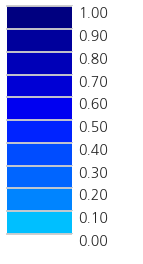

['#00bfff',
 '#0084ff',
 '#0065ff',
 '#004cff',
 '#0023ff',
 '#0000f1',
 '#0000d5',
 '#0000b8',
 '#00009c',
 '#000080']

In [56]:
dj_datamap(df, 'shadow', colors, legend='shadow', datanum=None, binmin=0, binmax=1, binstep=10, colortype='step')

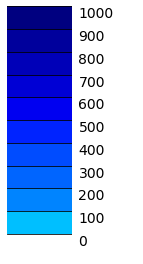

['#00bfff',
 '#0084ff',
 '#0065ff',
 '#004cff',
 '#0023ff',
 '#0000f1',
 '#0000d5',
 '#0000b8',
 '#00009c',
 '#000080']

In [21]:
dj_datamap(df, 'shadow', colors, legend='shadow', datanum=None, binmin=0, binmax=1000, binstep=10, colortype='step')

In [22]:
df['buld_elev'].sort_values(ascending=False)
df = df.loc[df['buld_elev'] < 350]

In [23]:
df['gro_flo_co'].sort_values(ascending=False)
df = df.loc[df['gro_flo_co'] <= 40]
df['gro_flo_co'].sort_values(ascending=False)

60780     40
81842     39
109500    39
23403     36
44697     36
134616    36
106864    36
69846     36
14816     35
135474    35
72532     35
66609     35
10896     35
42721     35
75861     34
121968    34
121970    34
38899     34
140449    33
85098     33
137316    33
29587     32
98434     32
35313     32
47995     32
137647    32
72822     32
103570    32
110014    31
79942     31
          ..
43938      0
117628     0
117629     0
51580      0
39406      0
30261      0
76273      0
108858     0
51496      0
124470     0
96060      0
136449     0
132894     0
76142      0
10150      0
127512     0
72363      0
76153      0
130201     0
90132      0
142167     0
130215     0
40839      0
108977     0
90072      0
108967     0
45267      0
132813     0
83990      0
140558     0
Name: gro_flo_co, Length: 147741, dtype: object

##### 3.4. Function : Distribution Visualization

In [25]:
import seaborn as sns
sns.set(style='whitegrid')
sns.set(font_scale=1)

import platform
system = platform.system()
print(system)

# -*- coding: UTF-8 -*-
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정 파일 위치: ', mpl.matplotlib_fname())
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

if system == 'Windows':
    datapath = os.getcwd() + '\\'
    imagepath = datapath + 'images\\'

    # ttf 폰트 전체개수
    print(len(font_list))
    font_list[:10]

    f = [f.name for f in fm.fontManager.ttflist]
    print(len(font_list))
    f[:10]

    [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

    path = 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'
    font_name = fm.FontProperties(fname=path, size=50).get_name()

    print(font_name)
    plt.rc('font', family=font_name)
  
elif system == 'Linux':
    datapath = os.getcwd() + '//'
    imagepath = datapath + 'images//'

#     !apt-get update -qq
#     !apt-get install fonts-nanum* -qq

    path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
    font_name = fm.FontProperties(fname=path, size=10).get_name()

    print(font_name)
    plt.rc('font', family=font_name)

    fm._rebuild()
    mpl.rcParams['axes.unicode_minus'] = False
  
else:
    print('# Sorry, my code has compatibility with Windows and Linux only.')
    exit(0)

Linux
버전:  3.1.0
설치 위치:  /home/jehyun/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py
설정 위치:  /home/jehyun/.config/matplotlib
캐시 위치:  /home/jehyun/.cache/matplotlib
설정 파일 위치:  /home/jehyun/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
NanumGothic


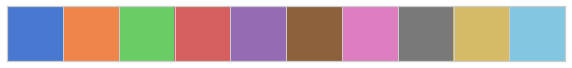

In [26]:
# Figure style setting
sns.set_style('whitegrid')
sns.palplot(sns.color_palette('muted'))
sns.set_context("talk")
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

In [40]:
import numpy as np
def dist_plot(df, xk, xv):

    fig, ax = plt.subplots(figsize=(6,6))
    f = sns.distplot(df[xk], kde=False, rug=False)

    if xv == '건물 면적':
        f.set(yscale='log')

    mean_val = df[xk].mean()
    std_val = df[xk].std()
    max_val = df[xk].max()
    min_val = df[xk].min()
    
    print('{}: mean= {:.2f}, st.dev.= {:.2f}, min= {:.2f}, max= {:.2f}'.format(xk, mean_val, std_val, min_val, max_val))

#     fig.text(0.3,0.8, '     mean : {:>3.02f}'.format(mean_val), fontsize=16)
#     fig.text(0.3,0.75, '        std : {:>3.02f}'.format(std_val), fontsize=16)
#     fig.text(0.3,0.7, '       max : {:>3.02f}'.format(max_val), fontsize=16)
#     fig.text(0.3,0.65, '       min : {:>3.02f}'.format(min_val), fontsize=16)

    # The most frequent bin
    heights = [h.get_height() for h in f.patches]
    index_max = np.argmax(heights)
#     max_x = f.patches[index_max].get_x() + np.array([0, f.patches[index_max].get_width()/2])
#     fig.text(0.3,0.6, 'max bin : {:>.02f}~{:>.02f}'.format(max_x[0], max_x[1]), fontsize=16, color='blue')
#     f.patches[index_max].set_color('blue')

    f.set(xlabel=xv)
    plt.tight_layout()
    f.figure.savefig('./images/distrib_{}.png'.format(xv))

In [57]:
xs = {
    'gro_flo_co' : '지상 층수',
    'buld_area' : '건물 면적',
    'buld_elev' : '건물 표고',
    'y17' : '음영반영 일사량',
    'st_y17': '위성일사량',
    'shadow': '음영 기인 일사량 손실률'
}

gro_flo_co: mean= 2.22, st.dev.= 2.61, min= 0.00, max= 40.00
buld_area: mean= 186.51, st.dev.= 773.33, min= 0.09, max= 130409.55
buld_elev: mean= 64.72, st.dev.= 24.00, min= 0.00, max= 347.80
y17: mean= 1080.84, st.dev.= 146.16, min= 0.00, max= 1457.28
st_y17: mean= 1445.17, st.dev.= 7.22, min= 1429.47, max= 1482.60
shadow: mean= 0.25, st.dev.= 0.10, min= -0.00, max= 1.00


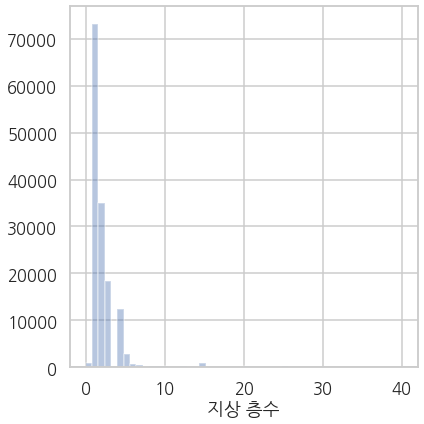

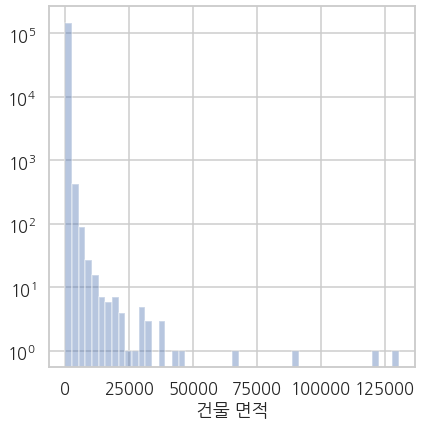

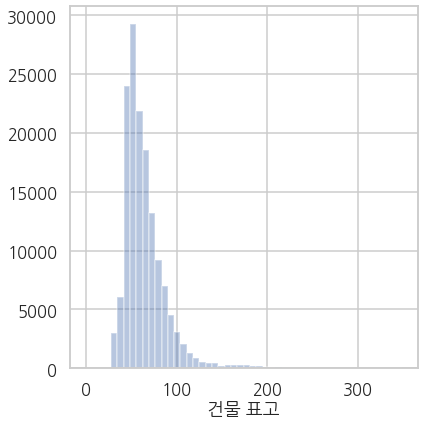

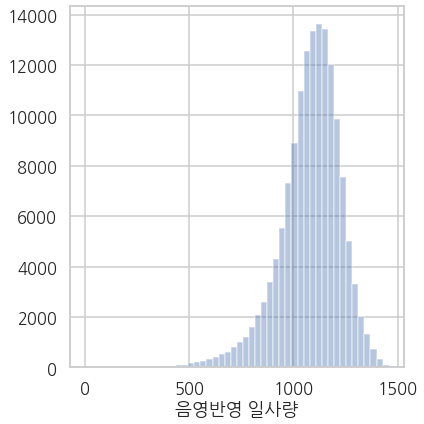

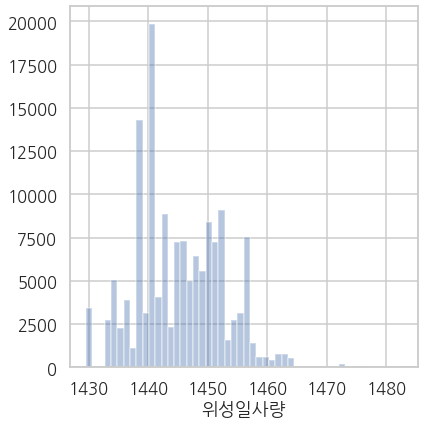

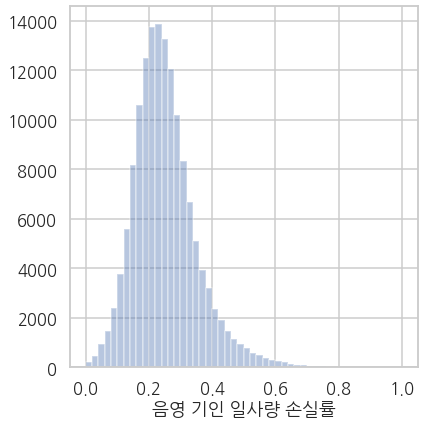

In [58]:
for xk, xv in xs.items():
    dist_plot(df, xk, xv)

In [30]:
flo_1 = df[df['gro_flo_co'] >= 10].shape[0]
print(flo_1)

print(flo_1/147754)

3169
0.021447811903569446


In [46]:
area_1 = df[df['buld_area'] < 1000].shape[0]
print(area_1)

print(area_1/df.shape[0])

144971
0.9812509729865102


In [31]:
df['gro_flo_co'] = df['gro_flo_co'].astype('int')

In [36]:
print(df.columns)
df2md(df.head())
col_del = ['gid', 'buld_se_cd', 'buld_se_nm', 'bdtyp_cd', 'apt_yn','sig_cd', 'sig_nm', 'emd_cd', 'emd_nm', 'm01', 'm02', 'm03', 'm04', 'm05', 'm06',\
       'm07', 'm08', 'm09', 'm10', 'm11', 'm12','st_m01', 'st_m02','st_m03', 'st_m04', 'st_m05', 'st_m06', 'st_m07', 'st_m08', 'st_m09','st_m10', 'st_m11', 'st_m12', ]
df1 = df.drop(columns=col_del)
df2md(df1.head())

Index(['gid', 'buld_se_cd', 'buld_se_nm', 'bdtyp_cd', 'apt_yn', 'gro_flo_co',
       'sig_cd', 'sig_nm', 'emd_cd', 'emd_nm', 'tm_x', 'tm_y', 'lon', 'lat',
       'buld_area', 'buld_elev', 'm01', 'm02', 'm03', 'm04', 'm05', 'm06',
       'm07', 'm08', 'm09', 'm10', 'm11', 'm12', 'y17', 'st_m01', 'st_m02',
       'st_m03', 'st_m04', 'st_m05', 'st_m06', 'st_m07', 'st_m08', 'st_m09',
       'st_m10', 'st_m11', 'st_m12', 'st_y17', 'shadow'],
      dtype='object')


(index)|gid|buld_se_cd|buld_se_nm|bdtyp_cd|apt_yn|gro_flo_co|sig_cd|sig_nm|emd_cd|emd_nm|tm_x|tm_y|lon|lat|buld_area|buld_elev|m01|m02|m03|m04|m05|m06|m07|m08|m09|m10|m11|m12|y17|st_m01|st_m02|st_m03|st_m04|st_m05|st_m06|st_m07|st_m08|st_m09|st_m10|st_m11|st_m12|st_y17|shadow
---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---
0|24300|0|지상|4299|N|1|30110|동구|30110137|대별동|241302.419829207|409864.414379324|127.459746194608|36.2858798245272|199.109760164108|80|61.587998174704|76.368132857176|108.372413947032|130.399191728005|153.301471581826|138.981246232986|94.1192299952874|116.160557618508|107.075909293615|76.0582836270332|63.2461349872442|57.7913106771616|1183.46187899663|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281|261.01187588617995
1|16295|0|지상|1001|N|1|30110|동구|30110105|가오동|240815.01297069|412384.958080419|127.454452653456|36.3086147051094|77.3923177693719|71|54.6587660438136|74.3240604024184|109.983418941498|131.021371841431|148.915192252711|136.026762912148|91.4622986442164|112.346493419848|109.010571178637|75.9642522084086|59.7529277174096|48.7103261571181|1152.17643617329|77.5996551513672|96.7234191894531|136.413635253906|159.390518188477|180.87614440918|165.518310546875|112.231346130371|137.366897583008|134.195907592773|96.3771133422852|79.9522476196289|72.7179718017578|1449.36315917969|297.1867230063999
2|24341|0|지상|1001|N|1|30110|동구|30110137|대별동|241460.822383503|410090.94543095|127.461521377075|36.2879144426327|91.0763856790575|77|62.304043189339|78.0388102324113|110.389678457509|130.250699416451|150.068157859471|135.022302627563|92.2708638232687|114.937465916509|108.497603748156|77.568351952926|64.5584099811056|58.3052325248718|1182.21162281866|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281|262.2621320641499
3|24345|0|지상|4402|N|1|30110|동구|30110137|대별동|241530.22297262|410067.763074595|127.462292655181|36.2877025481814|51.2017056163047|78|48.6805400936692|60.6419043452651|86.4692395528158|105.063324045252|123.864551473547|112.271188029536|75.3915986661558|93.4298842041581|85.6682357434873|60.3520038746021|50.0022062372278|45.6562534349936|947.490926106771|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281|496.982828776039
4|24374|0|지상|18999|N|1|30110|동구|30110137|대별동|241500.967910986|409605.204042476|127.461942445015|36.2835354035404|455.844166700596|80|67.2504756116031|84.0601618833709|119.429690775118|141.218664905481|162.556833049707|146.167080444202|99.8334377941332|124.410167208889|117.419092797396|83.4298420412499|69.2576492167356|62.8880742809229|1277.92121626201|77.4414291381836|97.5647354125977|136.456909179688|159.853820800781|181.146118164063|161.53076171875|109.31169128418|138.931045532227|133.254684448242|95.6145782470703|80.3922271728516|72.975700378418|1444.47375488281|166.55253862080008


(index)|gro_flo_co|tm_x|tm_y|lon|lat|buld_area|buld_elev|y17|st_y17|shadow
---|---|---|---|---|---|---|---|---|---|---
0|1|241302.419829207|409864.414379324|127.459746194608|36.2858798245272|199.109760164108|80|1183.46187899663|1444.47375488281|261.01187588617995
1|1|240815.01297069|412384.958080419|127.454452653456|36.3086147051094|77.3923177693719|71|1152.17643617329|1449.36315917969|297.1867230063999
2|1|241460.822383503|410090.94543095|127.461521377075|36.2879144426327|91.0763856790575|77|1182.21162281866|1444.47375488281|262.2621320641499
3|1|241530.22297262|410067.763074595|127.462292655181|36.2877025481814|51.2017056163047|78|947.490926106771|1444.47375488281|496.982828776039
4|1|241500.967910986|409605.204042476|127.461942445015|36.2835354035404|455.844166700596|80|1277.92121626201|1444.47375488281|166.55253862080008


In [59]:
df1['h_abs'] = df1['buld_elev'] + 3.14 * df1['gro_flo_co']
df2md(df1.head())

(index)|gro_flo_co|tm_x|tm_y|lon|lat|buld_area|buld_elev|y17|st_y17|shadow|h_abs
---|---|---|---|---|---|---|---|---|---|---|---
0|1|241302.419829207|409864.414379324|127.459746194608|36.2858798245272|199.109760164108|80|1183.46187899663|1444.47375488281|261.01187588617995|83.14
1|1|240815.01297069|412384.958080419|127.454452653456|36.3086147051094|77.3923177693719|71|1152.17643617329|1449.36315917969|297.1867230063999|74.14
2|1|241460.822383503|410090.94543095|127.461521377075|36.2879144426327|91.0763856790575|77|1182.21162281866|1444.47375488281|262.2621320641499|80.14
3|1|241530.22297262|410067.763074595|127.462292655181|36.2877025481814|51.2017056163047|78|947.490926106771|1444.47375488281|496.982828776039|81.14
4|1|241500.967910986|409605.204042476|127.461942445015|36.2835354035404|455.844166700596|80|1277.92121626201|1444.47375488281|166.55253862080008|83.14


* 인접 건물 추출

In [61]:
from sklearn.neighbors import KDTree
from numpy import array


def nearestBuild(build_data , meter) :

    start = time.time()

    # gu_locat
    xylocation = pd.DataFrame()
    xylocation['tm_x'] = build_data['tm_x']
    xylocation['tm_y'] = build_data['tm_y']
    xylocation['tm_x'] = xylocation['tm_x'].astype(float)
    xylocation['tm_y'] = xylocation['tm_y'].astype(float)
    # xylocation['gid'] = build_data['gid']
    # 위의 gid를 넣으면 이 값 까지 계산해서 거리를 잰다 

    xylocation_list = xylocation.values.tolist()
    xylocation_np = array(xylocation_list)
    tree = KDTree(xylocation_np)


    realnearest_ind = []
    realnearest_dist = []

    build_count_list = []
    realnearest_ind_list = []
    realnearest_dist_list = []

    for i in range(len(xylocation_np)) :

        # 기준 빌딩의 xy좌표와 최단거리에 있는 1000개의 인접 빌딩들을 탐색
        nearest_dist , nearest_ind = tree.query([xylocation_np[i]] , k = 1000)

        for j in range(1,len(nearest_dist[0])) :
            
            # 100 미터 안이고
            if nearest_dist[0][j] <= meter : 


                # 남쪽 + 양쪽 30도 위에도 포함
#                 buildsAngle = np.arctan2(xylocation_np[i][1]-xylocation_np[nearest_ind[0][j]][1] , xylocation_np[i][0]-xylocation_np[nearest_ind[0][j]][0])  * 180 /  np.pi

#                 if not ( -150 < buildsAngle <-30 ) :    
#                     realnearest_ind.append(nearest_ind[0][j])
#                     realnearest_dist.append(nearest_dist[0][j])


    #           남쪽에있는 빌딩들 만을 위한 처리 
                if  xylocation_np[i][1]-xylocation_np[nearest_ind[0][j]][1] > 0 :
                    realnearest_ind.append(nearest_ind[0][j])
                    realnearest_dist.append(nearest_dist[0][j])

            else :
                break

        nearest_ind = np.delete(nearest_ind[0][:j] , 0)
        build_count_list.append(len(realnearest_ind))
        realnearest_ind_list.append(realnearest_ind)
        realnearest_dist_list.append(realnearest_dist)

        realnearest_ind = []
        realnearest_dist = []
    
    # 조건에 맞는 빌딩이 없는경우 자기 자신을 넣준다 ( 에러방지 , 빈 list가 있다면 에러가 남 )
    nearZero_list = []
    for i in range(len(realnearest_ind_list)) :
        if len(realnearest_ind_list[i]) == 0 :
            nearZero_list.append(i)
            realnearest_ind_list[i].append(i)
            realnearest_dist_list[i].append(0)

    print("find nearestBuild time :", time.time() - start) 

    
    return realnearest_ind_list , realnearest_dist_list , nearZero_list


df1['tm_x'] = df1['tm_x'].astype(float)
df1['tm_y'] = df1['tm_y'].astype(float)
realnearest_ind_list , realnearest_dist_list , nearZero_list = nearestBuild(df1 , 100)

find nearestBuild time : 45.476884603500366


In [65]:
def minmaxCheck(realnearest_dist_list) :
    maxNum = 0 
    minNum = 100000
    maxIdx = 0
    minIdx = 0
    for i in range(len(realnearest_dist_list)) :
        for num in realnearest_dist_list[i] :
            if num > maxNum :
                maxNum = num
                maxIdx = i
            if minNum > num and num > 0 :
                minNum = num
                minIdx = i
    print("Dist min 값 : " , minNum , "max 값 : " , maxNum)
    print("Dist min idx : " , minIdx , "max idx : " , maxIdx)
    return minIdx , maxIdx

minIdx , maxIdx =  minmaxCheck(realnearest_dist_list)

Dist min 값 :  0.6699526599160539 max 값 :  99.99997302055972
Dist min idx :  145740 max idx :  59332


In [66]:
def validifyDisZero(realnearest_dist_list) :
    for i in range(len(realnearest_dist_list)) :
        for num in realnearest_dist_list[i] :
            if num == 0 :
                if i != realnearest_ind_list[i][0] :
                    print(str(i) +"번째 인덱스 에러")
                    return 0
    
    print("> 빈 list 없음")

validifyDisZero(realnearest_dist_list)

> 빈 list 없음


In [117]:
df1['lon'] = df1['lon'].astype('float')
df1['lat'] = df1['lat'].astype('float')

In [115]:
def checkCalAngle(df, idx_tgt ) :

    # filename to be saved
    filename = 'near_{}'.format(idx_tgt)
    
    # folium map
    idx_lat = df['lat'].loc[idx_tgt]
    idx_lon = df['lon'].loc[idx_tgt]
    m = folium.Map(location=[idx_lat, idx_lon], 
                   tiles='CartoDB positron',
                   zoom_start=13)
    
    # target building
    folium.CircleMarker(
            location = [idx_lat, idx_lon],
            color='red',
            fill_color='red',
            fill_opacity=1,
            radius=10,
            weight=0
        ).add_to(m)
    
    # plot : data as markers (actually, dots)
    dist = realnearest_dist_list[idx_tgt]
    for i in range(len(realnearest_ind_list[idx_tgt])):
        idx = realnearest_ind_list[idx_tgt][i]
        # Get longitude/latitude
        lon = df['lon'].loc[idx]
        lat = df['lat'].loc[idx]
        print(lon, lat)
        
        if i == 0:
            color = 'blue'
        else:
            color = 'black'
            
        folium.CircleMarker(
            location = [lat, lon],
            color='black',
            fill_color=color,
            fill_opacity=0.5,
            radius=5,
            weight=0,
            popup = realnearest_dist_list[idx_tgt][i]
        ).add_to(m)
        
          
            
    # save as file
    html2png(m, '{}.html'.format(filename), '{}.png'.format(filename))


In [112]:
def check_n_run(df, idx):
    subset = pd.DataFrame({'idx':realnearest_ind_list[idx], 
                           'dist':realnearest_dist_list[idx]})
    print(subset.shape)
    df2md(subset)
    checkCalAngle(df, idx )

In [118]:
check_n_run(df1, 0)

(26, 2)


(index)|idx|dist
---|---|---
0|73955|13.532133963279891
1|120146|21.596315106145994
2|9266|25.855557210560026
3|137866|32.772468882165974
4|26656|35.806688161182244
5|119830|47.02419950641303
6|45235|51.164532606365206
7|63792|52.358434971825595
8|26657|53.141710950122324
9|119269|54.75078398687052
10|17282|55.376492079549834
11|8012|58.21372947054864
12|91692|63.48694503766112
13|82473|70.49829236290618
14|45236|70.67026259965367
15|96015|70.82120747369889
16|129445|76.47250935875135
17|31388|77.78930957216672
18|18597|78.10517396639115
19|35899|79.93439634435447
20|31661|85.64573909069155
21|101675|88.47980920662756
22|102878|89.73878204854529
23|129444|92.42632026448118
24|9058|97.72059031742533
25|63794|98.36519896681955


127.455263603485 36.2674395086325
127.454752403412 36.2675485511377
127.446306423177 36.3172481931722
127.461309166712 36.3215575457324
127.459194523359 36.2862679684196
127.42731179051 36.3534303609667
127.458388637808 36.276612176723
127.443225957427 36.3344857510127
127.459575371255 36.2855882846985
127.424249671265 36.4392818405083
127.456931990069 36.2818323064143
127.458787487022 36.2846008728287
127.435369721476 36.2555433227519
127.426245735868 36.3451436932867
127.458239180323 36.2852026191332
127.480296433242 36.257780369269
127.438855607945 36.2519471739923
127.367368671745 36.3330844197134
127.400823021854 36.3170343354564
127.436890978702 36.2562724447136
127.341369417218 36.2348597298779
127.45582782352 36.2683010490373
127.442815804671 36.2238435397705
127.439444450594 36.2520609029733
127.459880633356 36.2860110252287
127.448829695435 36.3678942707051


WebDriverException: Message: Failed to decode response from marionette


In [114]:
print('"0"\n{}'.format(df1[['tm_x', 'tm_y']].loc[0]))
print('"73955"\n{}'.format(df1[['tm_x', 'tm_y']].loc[73955]))

"0"
tm_x    241302.419829
tm_y    409864.414379
Name: 0, dtype: float64
"73955"
tm_x    240909.333200
tm_y    407816.278003
Name: 73955, dtype: float64
